In [1]:
import os
# change directory to the root of the repository. Execute only once!
# All utils assume that the working directory is the root directory of the github folder
os.chdir('../')

In [2]:
from utils import HypergraphModels as HM
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_cardinality_distribution(H, ax = None, log_log = False):
    """
    Plot the cardinality distribution of a hypergraph.

    Parameters:
    - H (np.array): Hypergraph represented as a 2D NumPy array, where each row corresponds
                    to a hyperedge, and entries within a row represent the node indices belonging to the hyperedge. 
    - ax (matplotlib.axis): ax to be used for the plot. default None
    """
    if ax==None:
        fig ,ax = plt.subplots()
    cardinalities = [e[0] for e in H]
    ax.hist(cardinalities, bins=np.arange(min(cardinalities), max(cardinalities) + 1.1) - 0.5, density=True, alpha=0.75) #1.1 is to include the max cardinalities?
    ax.set_title('Cardinality Distribution')
    ax.set_xlabel('Cardinality')
    ax.set_ylabel('Probability')
    if log_log:
        ax.set_xscale('log')
        ax.set_yscale('log')

def plot_degree_distribution(H, ax = None, return_degrees = False, log_log = False):
    """
    Plot the degree distribution of a hypergraph.

    Parameters:
    - H (np.array): Hypergraph represented as a 2D NumPy array, where each row corresponds
                    to a hyperedge, and entries within a row represent the node indices belonging to the hyperedge. 
    - ax (matplotlib.axis): ax to be used for the plot. default None
    - return_degrees (Bool): whether to return the degree sequence or not
    """
    degrees = np.zeros(np.concatenate(H).max()+1)
    for row in H:
        for node in row[1:]:
            degrees[node] += 1  # Increment degree for each node in the hyperedge

    if ax==None:
        fig ,ax = plt.subplots()
    ax.hist(degrees, bins=np.arange(min(degrees), max(degrees) + 1.1) - 0.5, density=True, alpha=0.75)
    ax.set_title('Degree Distribution')
    ax.set_xlabel('Node')
    ax.set_ylabel('Probability')
    if log_log:
        ax.set_xscale('log')
        ax.set_yscale('log')

    if return_degrees: return degrees



### Generate uniform hypergraphs with Power-Law degree distribution

We can use the function **Generate_Uniform_PL_Hypergraph** to generate uniform hypergraphs with Power-Law degree distribution. Such hypergraph has a theoretical average degree of c*(M/N), where c is the cardinality.

Note that the average degree may vary slightly for a low values of cardinality and hyperedge number, since a connected components of size N may be harder to find.

In [4]:
cardinality=10
N=1000
m=1000
H = HM.Generate_Uniform_PL_Hypergraph(cardinality,N,m,gamma = 3.2)

the average degree is 10.0


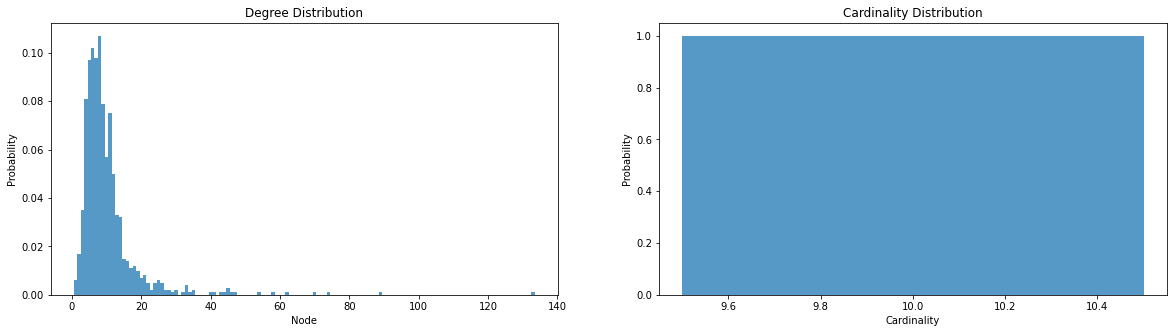

In [5]:
### check the degree and cardinality distribution
fig, axs = plt.subplots(1,2, figsize = (20,5))

degree_sequence = plot_degree_distribution(H, ax = axs[0], return_degrees=True)
plot_cardinality_distribution(H, ax=axs[1])

print(f'the average degree is {np.mean(degree_sequence)}')
plt.show()

### Random uncorrelated model for hypergraphs with Power-Law cardinality distribution

We can use the function **Generate_PL_Hypergraph**.

In [32]:
cardinality=10
N=1000
m=1000
H = HM.Generate_PL_Hypergraph(gamma=2.5,kmin=2,N=N, m= m)

the average degree is 3.751


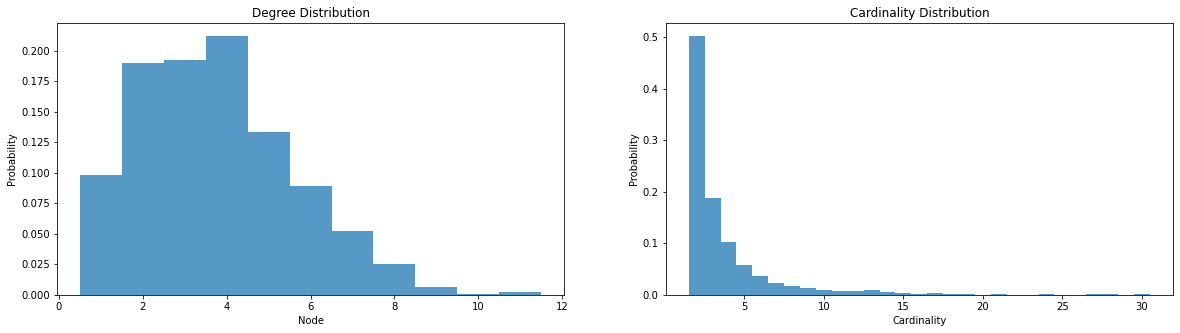

In [33]:
### check the degree and cardinality distribution
fig, axs = plt.subplots(1,2, figsize = (20,5))

degree_sequence = plot_degree_distribution(H, ax = axs[0], return_degrees=True)
plot_cardinality_distribution(H, ax=axs[1])

print(f'the average degree is {np.mean(degree_sequence)}')
plt.show()

### Random uncorrelated model for hypergraphs with Poisson cardinality distribution

We can use the function **Generate_Poisson_Hypergraph**.

In [34]:
beta = 5
N = 1000
m = 1000
H = HM.Generate_Poisson_Hypergraph(beta,N,m)

the average degree is 5.265


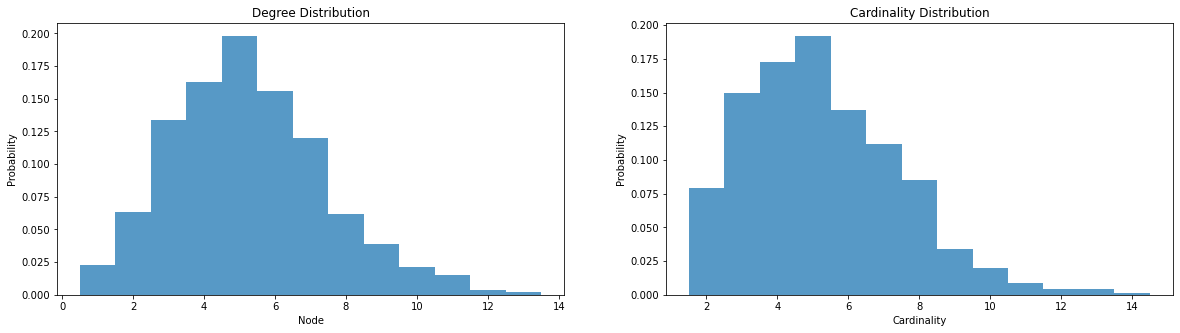

In [35]:
### check the degree and cardinality distribution
fig, axs = plt.subplots(1,2, figsize = (20,5))

degree_sequence = plot_degree_distribution(H, ax = axs[0], return_degrees=True)
plot_cardinality_distribution(H, ax=axs[1])

print(f'the average degree is {np.mean(degree_sequence)}')
plt.show()

### Random uncorrelated model for Uniform hypergraphs with cardinality = 20

In [8]:
cardinality=20
N=1000
m=1000
H = HM.Generate_Uniform_Hypergraph(cardinality,N,m,delta_n=0)

the average degree is 20.0


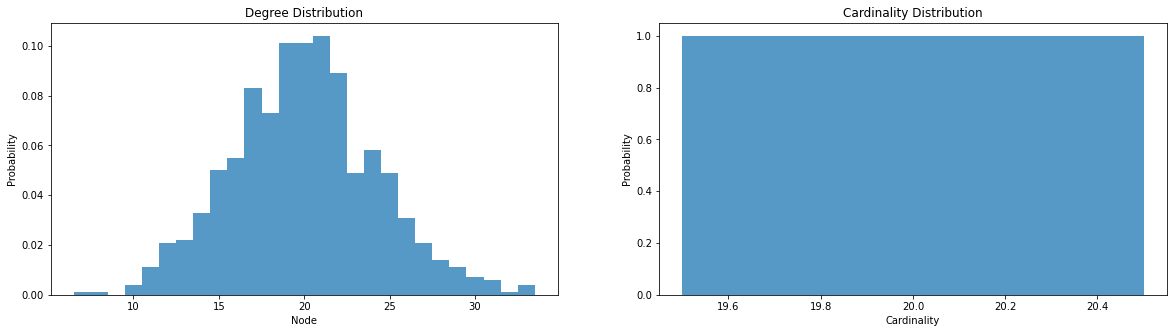

In [9]:
### check the degree and cardinality distribution
fig, axs = plt.subplots(1,2, figsize = (20,5))

degree_sequence = plot_degree_distribution(H, ax = axs[0], return_degrees=True)
plot_cardinality_distribution(H, ax=axs[1])

print(f'the average degree is {np.mean(degree_sequence)}')
plt.show()